In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split, KFold 
import random
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

##Load training data##

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/fzr72725/DigitR/master/train.csv')

In [3]:
data.isnull().values.any()

False

In [4]:
data.shape

(42000, 785)

## Visualize pixel array into actual digits##

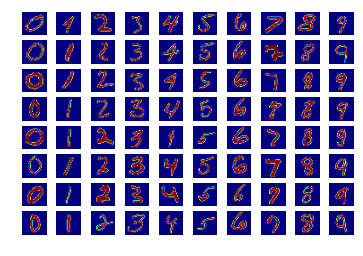

In [5]:
for r in range(0,8):
    data_plt = data.sample(frac=0.01).reset_index().drop('index',axis=1)
    for c in range(10):    
        for i in range(len(data_plt)):
            if data_plt['label'][i]==c:
                plt.subplot(8,10,c+1+r*10)
                plt.imshow(data_plt.drop('label',axis=1).iloc[i].reshape((28, 28)))
                plt.axis('off')
                break

In [6]:
X = data.drop('label', axis=1)

In [7]:
X[:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y = data['label']

##Load testing data##

In [9]:
X_te = pd.read_csv('https://raw.githubusercontent.com/fzr72725/DigitR/master/test.csv')

In [10]:
X_te[:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_te['ImageId'] = X_te.index.values+1

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
X_train.shape

(28140, 784)

In [14]:
X_test.shape

(13860, 784)

In [15]:
y_train[:5]

36415    6
10459    2
17756    0
24052    7
14737    2
Name: label, dtype: int64

**Get 100 rows to test the logic first**

In [16]:
rows_train = random.sample(X_train.index, 500)

In [17]:
rows_test = random.sample(X_test.index, 500)

In [18]:
X_train_sample = X_train.ix[rows_train]

In [19]:
X_train_sample.shape

(500, 784)

In [20]:
X_train_sample.isnull().values.any()

False

In [21]:
X_test_sample = X_test.ix[rows_test]
y_train_sample = y_train.ix[rows_train]
y_test_sample = y_test.ix[rows_test]

In [22]:
X_test_sample.isnull().values.any()

False

In [23]:
y_test_sample.isnull().values.any()

False

In [24]:
y_train_sample.isnull().values.any()

False

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_sample, y_train_sample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

##Print crosstab to see the accuracy##

In [26]:
pd.crosstab(y_test_sample, knn.predict(X_test_sample), rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,47,0,0,0,0,0,0,0,0,1
1,0,54,0,0,0,0,0,0,0,0
2,0,7,41,3,0,0,0,2,0,1
3,3,2,1,46,0,1,0,1,0,2
4,1,5,2,0,30,0,0,0,0,10
5,2,4,0,1,0,34,6,0,0,2
6,0,1,0,0,0,0,46,0,1,0
7,0,6,0,0,0,0,0,40,0,0
8,2,5,0,6,1,1,2,0,24,5


In [27]:
result = pd.crosstab(y_test_sample, knn.predict(X_test_sample), rownames=["Actual"], colnames=["Predicted"])

In [28]:
labels = range(10)

In [29]:
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
percentage = {}
for l in labels:
    percentage[l] = (float(result[l][l])/float(sum(result.ix[l])))

In [31]:
percentage

{0: 0.9791666666666666,
 1: 1.0,
 2: 0.7592592592592593,
 3: 0.8214285714285714,
 4: 0.625,
 5: 0.6938775510204082,
 6: 0.9583333333333334,
 7: 0.8695652173913043,
 8: 0.5217391304347826,
 9: 0.803921568627451}

In [32]:
df_p = pd.Series(percentage)
df_p.index.name = 'labels'

In [33]:
df_p.to_frame(name='accuracy')

,accuracy
labels,
0,0.979167
1,1.000000
2,0.759259
3,0.821429
4,0.625000
5,0.693878
6,0.958333
7,0.869565
8,0.521739


##Check accuracy using sklearn score() method##

In [34]:
print('KNN score: %f' % knn.fit(X_train_sample, y_train_sample).score(X_test_sample, y_test_sample))

KNN score: 0.806000


##Using the whole training data set to model and predict##

In [35]:
X_te[:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,ImageId
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [36]:
submit = pd.DataFrame(X_te.ImageId, columns=['ImageId'])

In [37]:
submit[:5]

,ImageId
0,1
1,2
2,3
3,4
4,5


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [ ]:
submit['Label'] = knn.predict(X_te.drop('ImageId',axis=1))

In [ ]:
submit[:5]

In [ ]:
submit.to_csv('submisson_k3_d.csv',index=False)